<a href="https://colab.research.google.com/github/saiprakashPJ/Lyric-Creators/blob/master/RAPWriter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files

In [5]:
uploaded=files.upload()

Saving data.txt to data.txt


In [13]:
import io
text=io.StringIO(uploaded['data.txt'].decode("utf-8"))

In [22]:
with open('data.txt','r') as f:
  textdata=f.read().lower().split('\n')

In [35]:
textdata

['fake hai zamana',
 'ye tumne na jaana',
 'sach hai tumhe batana',
 'ke',
 'sab ke peeche hai sab sabko gaali deete',
 'phir bhi tumhare samne woh tumhe taali deete',
 'sabke dimaag mein chal raha game hai',
 'rishthoon se zyada prior lagta sabko fame hai',
 'faltu ke baatien sab karte idhar udhar',
 'soch ke in sab ko phatt jata mera sar',
 'swag se bhare  sab dikhna chahte hai',
 'phati  jeans pehnkar dope kehlate hai',
 'woh ye nahi samajhte ye kala ki baat hai',
 'jiske haath mein hai kalam uska hi raaj hai',
 'jo log kehte  ye khuda ki dain hai',
 'unko bata doon mai ye soch ki baat hai',
 'soch yahi ke tu kuch bhi kar sakta hai',
 'likhde sach jo bhi tujhe dikhta hai',
 'phir tu dekh',
 'tujh mein kya baat hai',
 'iss talent ko sawarne ka avsar tere paas hai',
 'baat meri sun',
 'kyunki baat meri naayi hai',
 'baat meri samajh',
 'kyunki sooch meri sahi hai',
 'ghatiya rapperon ki baaton mein',
 'dum nahi hai',
 'mere samne un sab mein',
 'lag rahi kami hai',
 'ye tho bas shuruw

In [20]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [27]:
tokenizer=Tokenizer()
corpus=textdata
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)

{'hai': 1, 'tu': 2, 'mein': 3, 'ke': 4, 'ko': 5, 'le': 6, 'ye': 7, 'ki': 8, 'sab': 9, 'baat': 10, 'se': 11, 'gum': 12, 'na': 13, 'meri': 14, 'aage': 15, 'gaya': 16, 'bhi': 17, 'nahi': 18, 'kya': 19, 'abb': 20, 'kyunki': 21, 'kyu': 22, 'iss': 23, 'sooch': 24, 'tum': 25, 'gyaan': 26, 'soch': 27, 'jo': 28, 'kar': 29, 'tera': 30, 'khaas': 31, 'raha': 32, 'sahi': 33, 'tho': 34, 'zindagi': 35, 'badlo': 36, 'maan': 37, 'faisle': 38, 'de': 39, 'jata': 40, 'ka': 41, 'apni': 42, 'insaan': 43, 'apne': 44, 'par': 45, 'teri': 46, 'thoda': 47, 'lagta': 48, 'baatien': 49, 'hi': 50, 'mai': 51, 'ek': 52, 'gender': 53, 'inequality': 54, 'naam': 55, 'haan': 56, 'mujhko': 57, 'samne': 58, 'dimaag': 59, 'karte': 60, 'kuch': 61, 'tujhe': 62, 'badh': 63, 'pe': 64, 'ladki': 65, 'jaan': 66, 'facade': 67, 'unhe': 68, 'saka': 69, 'hoon': 70, 'woh': 71, 'log': 72, 'dekh': 73, 'samajh': 74, 'baaton': 75, 'dum': 76, 'rahi': 77, 'bhai': 78, 'kitna': 79, 'koi': 80, 'bada': 81, 'hoo': 82, 'uski': 83, 'saari': 84, 'muh

In [30]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)
max_sequence_len=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))
xs,labels=input_sequences[:,:-1],input_sequences[:,-1]
ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

# New Section

In [32]:
model=Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(60,return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xs,ys,epochs=1000,verbose=1)

Epoch 1/1000
42/42 [==============================] - 1s 17ms/step - loss: 6.1067 - accuracy: 0.0586
Epoch 2/1000
42/42 [==============================] - 1s 16ms/step - loss: 5.5179 - accuracy: 0.0769
Epoch 3/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.4037 - accuracy: 0.0769
Epoch 4/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.3572 - accuracy: 0.0769
Epoch 5/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.2975 - accuracy: 0.0769
Epoch 6/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.2373 - accuracy: 0.0769
Epoch 7/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.1749 - accuracy: 0.0769
Epoch 8/1000
42/42 [==============================] - 1s 18ms/step - loss: 5.1240 - accuracy: 0.0769
Epoch 9/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.0585 - accuracy: 0.0791
Epoch 10/1000
42/42 [==============================] - 1s 17ms/step - loss: 5.0025 - accura

In [33]:
import matplotlib.pyplot as plt
def plot_graphs(histroy,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

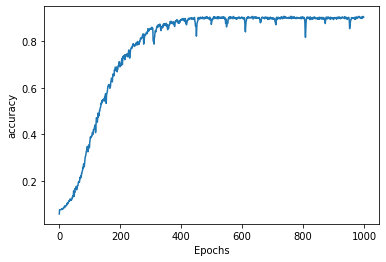

In [34]:
plot_graphs(history,'accuracy')

In [41]:
seed_text = "uth ja apni raakh se tu udd ja ab taalash mein "
next_words = 100
for j in range(next_words):
  if j%(max_sequence_len-1)==0:
    seed_text=seed_text+"\n"
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
  predicted=model.predict_classes(token_list,verbose=0)
  output_word=""
  for word,index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text+=" "+output_word
print(seed_text)

uth ja apni raakh se tu udd ja ab taalash mein 
 na dar hai dekhte ghar nahi awaari baap kitne meri
 saale aise kaise tha band rulaya usko sochenge ke dard
 jata banna sochenge in se mujhko hai dikhta hai profane
 sabko rulaya usko chudvaya jata mera banna sochenge jiski banna
 chor gaya de awaari gaya gaya ka banna sochenge sahi
 chakkar mein sahi hai naam awaari sab tu ye sabko
 apne dum jata kabka thamaya jata waar banna sochenge loog
 karunga awaari gaya ke tujhme baat aad mein unhe tu
 bulaya ka avsar tere paas hai baithe sab uski shaadi
 tab sochenge ke kabil mujhko usko banane thoda baari beetiyon
